In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read data
data = pd.read_csv("kaggle/input/pump-sensor-data/sensor.csv")

## Data Cleaning

### Understanding the data

In [ ]:
#returns a tuple that gives dimentions of the array
data.shape

In [ ]:
#returns column names
data.columns

In [ ]:
# returns data types of each column
data.dtypes

In [ ]:
# checkign whether the dataset is empty
data.empty

In [ ]:
## returns first five rows
data.head()

In [ ]:
##returns last five rows
data.tail()

In [ ]:
#computes a summary of statistics pertaining to the DataFrame columns and print the transpose of the result
data.describe().transpose

In [ ]:
# sensor_50 data with machine status
Broken = data[data['machine_status']=='BROKEN']
Recovery = data[data['machine_status']=='RECOVERING']

In [ ]:
# sensor data with machine status
import seaborn as sns



Sensors = data.iloc[:,1:50]
sensorNames=Sensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(40,3))
    _ = plt.plot(Recovery[sensor], linestyle='none', marker='o', color='blue', markersize=4)
    _ = plt.plot(Broken[sensor], linestyle='none', marker='X', color='red', markersize=14)
    _ = plt.plot(data[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

### Managing Data

In [2]:
# 1. Changing data types. timestamp column- chnage from object to datetime
# 2. Sort data. By timestamp column

data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S')
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data.sort_values(by=['timestamp'], ascending=True, inplace=True) 
print(data.dtypes['timestamp'])

data.head()

datetime64[ns]


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
#getting the delta time betwwen last day of teh datat set and yesterday
import datetime
from datetime import timedelta

today = datetime.date.today()
yesterday = today - timedelta(days=1)

last_date = data['timestamp'].iloc[-1]
lastday = datetime.date(2018, 8, 31)

test_delta = yesterday - lastday

In [ ]:
# 1. Setting the timestamp column as index
# 2. Rename the old collumn
# 3. shifting the time range to a recent time range
# 4. reset the index back to the sequesnce

data.set_index('timestamp', drop=False, inplace=True)
data.rename({'timestamp':'old_timestamp'}, axis=1, inplace=True)
data = data.shift(periods=test_delta.days, freq='D',axis=0)
data.reset_index(inplace=True)
data.drop(['old_timestamp'], axis=1, inplace=True)
display(data)

### Handling Missing Values and gaps

In [ ]:
#Checking for gaps in data. timestamp column

pd.date_range(start = data['timestamp'].iloc[0], end = data['timestamp'].iloc[-1] , freq="1min" ).difference(data['timestamp'])

In [ ]:
# check for missing values
# returns the sum of null values in each column whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike). 

#missing values in numbers
#data.isnull().sum()

# checking missing values in other columns in percentages
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

In [ ]:
#For categorical variables we can introduce a new category
data['machine_status'].value_counts()

In [ ]:
import seaborn as sns

# sensor_50 data with machine status
Broken = data[data['machine_status']=='BROKEN']
Recovery = data[data['machine_status']=='RECOVERING']

sns.set_context('talk')
_ = plt.figure(figsize=(30,5))
_ = plt.plot(Recovery['sensor_50'], linestyle='none', marker='o', color='blue', markersize=4)
_ = plt.plot(Broken['sensor_50'], linestyle='none', marker='X', color='red', markersize=14)
_ = plt.plot(data['sensor_50'], color='grey')
_ = plt.title('sensor_50')
plt.show()

Sensor_50 doesn't contain any data from ~ 140000 onwards. If we remove data points we will have to loose nearly 35% of observations. Therefore, instead of removing data we remove the variable to maintain the quality of the dataset.

In [ ]:
# sensor_51 data with machine status
sns.set_context('talk')
_ = plt.figure(figsize=(30,5))
_ = plt.plot(Recovery['sensor_51'], linestyle='none', marker='o', color='blue', markersize=4)
_ = plt.plot(Broken['sensor_51'], linestyle='none', marker='X', color='red', markersize=14)
_ = plt.plot(data['sensor_51'], color='grey')
_ = plt.title('sensor_51')
plt.show()

Sensor_51 prvides no sensor data about two breakdown at the period of missing data. Those missing status won't add any significant value to the machine status. Therefore, removing sensor_51 wouldn't make any huge affect.

In [ ]:
# sensor_00 data with machine status
sns.set_context('talk')
_ = plt.figure(figsize=(30,5))
_ = plt.plot(Recovery['sensor_00'], linestyle='none', marker='o', color='blue', markersize=4)
_ = plt.plot(Broken['sensor_00'], linestyle='none', marker='X', color='red', markersize=14)
_ = plt.plot(data['sensor_00'], color='grey')
_ = plt.title('sensor_00')
plt.show()

Even thpoough the missing date percentage of sensor_00 is ~5%, it provides sensor data at all the machine breakdown periods. Thus sensor_00 will be important for the analysis.

In [ ]:
#remove all NaN columns and all columns with zero standard values.

data.drop(['sensor_15', 'sensor_50', 'sensor_51', 'Unnamed: 0'], axis=1, inplace=True)

#### Imputation
All the other missing values should be imputed in a proper manner. There are some basic approaches that we can use to impute missing values are,

zero imputation,<br>
mean imputation.<br>
forward or backward fill imputation.<br>

Appropriate imputation method should be selected through a insight analysis between missing values and machine status.

Let's plot the senseor data with machine status!

In [ ]:
# sensor data with machine status
import seaborn as sns

Sensors = data.iloc[:,1:50]
sensorNames=Sensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(40,3))
    _ = plt.plot(Recovery[sensor], linestyle='none', marker='o', color='blue', markersize=4)
    _ = plt.plot(Broken[sensor], linestyle='none', marker='X', color='red', markersize=14)
    _ = plt.plot(data[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

Allmost all the times, sensor data has gone missing when there is a breakdown or a recovery period. Therfore, mean imputation would not be a best method to impute the missing values.
Zero imputation would be better method, since sensor data may lost when there is a breakdown. This is a good approach for the first set of sensors, as data is lost when a breakdown occurs. But that is not the case for the final sensor kit. Those data shows a higher values when there is a breakdown.
Therefore, forward fill or backward fill would be a best match for missing value imputaion in this kind of scenarios. I choose <b>Forward Fill</b>.

In [ ]:

# Replacing missing values - for the quantitative varibales that does have missing values
# Using interpolate method to fill null values. Data is essentially fitted from one point to the next.

for col in data.columns:
    if data[col].isnull().sum() > 0:
        try:
            data[col].ffill( inplace=True)
        except ValueError:
            pass
        
data.isnull().sum()

In [ ]:
data.columns

In [ ]:
# Replace missing values and normalize the dataset

from sklearn import preprocessing

names = data.iloc[:,1:50].columns
x = data.iloc[:,1:50].fillna(method = 'ffill')
scaler = preprocessing.Normalizer(norm='max')
x = scaler.fit_transform(x.transpose())
x = pd.DataFrame(x.transpose())
x.columns = names

y = data['machine_status']

x.head()

In [ ]:
print(names)

In [ ]:
y.unique()

In [ ]:
one_hot = pd.get_dummies(y)
one_hot.head()

In [ ]:
status = [(data['machine_status'] == 'BROKEN'), (data['machine_status'] == 'RECOVERING'), (data['machine_status'] == 'NORMAL')]
values = [1,0,0]
data['machine_status'] = np.select(status, values, default=0)


#data.drop(['machine_status'], axis=1, inplace=True)
#data.to_csv('testout/test_data1.csv')

In [ ]:
data.columns

In [ ]:
#downsampling data
data.set_index('timestamp', inplace=True)
resample_df = data.resample('H')
#data_per_hour = resample_df.mean()
data_per_hour = resample_df.agg({'machine_status':'max',
                                'sensor_00': 'mean', 'sensor_01': 'mean', 'sensor_02': 'mean', 'sensor_03': 'mean', 'sensor_04': 'mean',
                                'sensor_05': 'mean', 'sensor_06': 'mean', 'sensor_07': 'mean', 'sensor_08': 'mean', 'sensor_09': 'mean',
                                'sensor_10': 'mean', 'sensor_11': 'mean', 'sensor_12': 'mean', 'sensor_13': 'mean', 'sensor_14': 'mean',
                                'sensor_16': 'mean', 'sensor_17': 'mean', 'sensor_18': 'mean', 'sensor_19': 'mean', 'sensor_20': 'mean',
                                'sensor_21': 'mean', 'sensor_22': 'mean', 'sensor_23': 'mean', 'sensor_24': 'mean', 'sensor_25': 'mean',
                                'sensor_26': 'mean', 'sensor_27': 'mean', 'sensor_28': 'mean', 'sensor_29': 'mean', 'sensor_30': 'mean',
                                'sensor_31': 'mean', 'sensor_32': 'mean', 'sensor_33': 'mean', 'sensor_34': 'mean', 'sensor_35': 'mean',
                                'sensor_36': 'mean', 'sensor_37': 'mean', 'sensor_38': 'mean', 'sensor_39': 'mean', 'sensor_40': 'mean',
                                'sensor_41': 'mean', 'sensor_42': 'mean', 'sensor_43': 'mean', 'sensor_44': 'mean', 'sensor_45': 'mean',
                                'sensor_46': 'mean', 'sensor_47': 'mean', 'sensor_48': 'mean', 'sensor_49': 'mean'})
#data_per_hour.reset_index(inplace=True)
data_per_hour

In [ ]:
#data_per_hour.to_csv('testout/test_data2.csv')
data_per_hour.head()

In [ ]:
##Adding the column called "alarm" to indicate the alarm window
# value=2, 10h-5min ahead of the machine failure

def add_alarm_column(df, Failure_times,timewindow_for_prediction):
  for i,failure_time in enumerate(Failure_times):
    start_predic_time=failure_time-pd.Timedelta(minutes=60*timewindow_for_prediction[0]) #  mins before the failure time
    stop_predic_time=failure_time-pd.Timedelta(minutes=60*timewindow_for_prediction[1]) #  mins before the failure time
    df.loc[start_predic_time:stop_predic_time,'alarm']=2 # can not use 1, because 1 indicate the machine failure time
  return df

In [ ]:
# value=2, 10h-5min ahead of the machine failure is the alarm windows

data_per_hour['alarm']=data_per_hour['machine_status']
Failure_times=data_per_hour[data_per_hour['machine_status']==1].index
data_per_hour=add_alarm_column(data_per_hour, Failure_times, (24,1)) # 24h-1h ahead of failure is the alarm windows

In [ ]:
#data_per_hour.to_csv('testout/test_data3.csv')
data_per_hour
#data_per_hour.reset_index(inplace=True)
data_per_hour.tail(20)

<p>The data includes sensor data from 52 different sensors but they are not specified as which operating parameter is each. Eg: Pressure, temperature,flow,vibration,..etc.</p>

<p>We need to make a judgement about which sensor data will be a decsive parameter to the operating status of the pump.</p>

### Analysis on Sensor Data

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

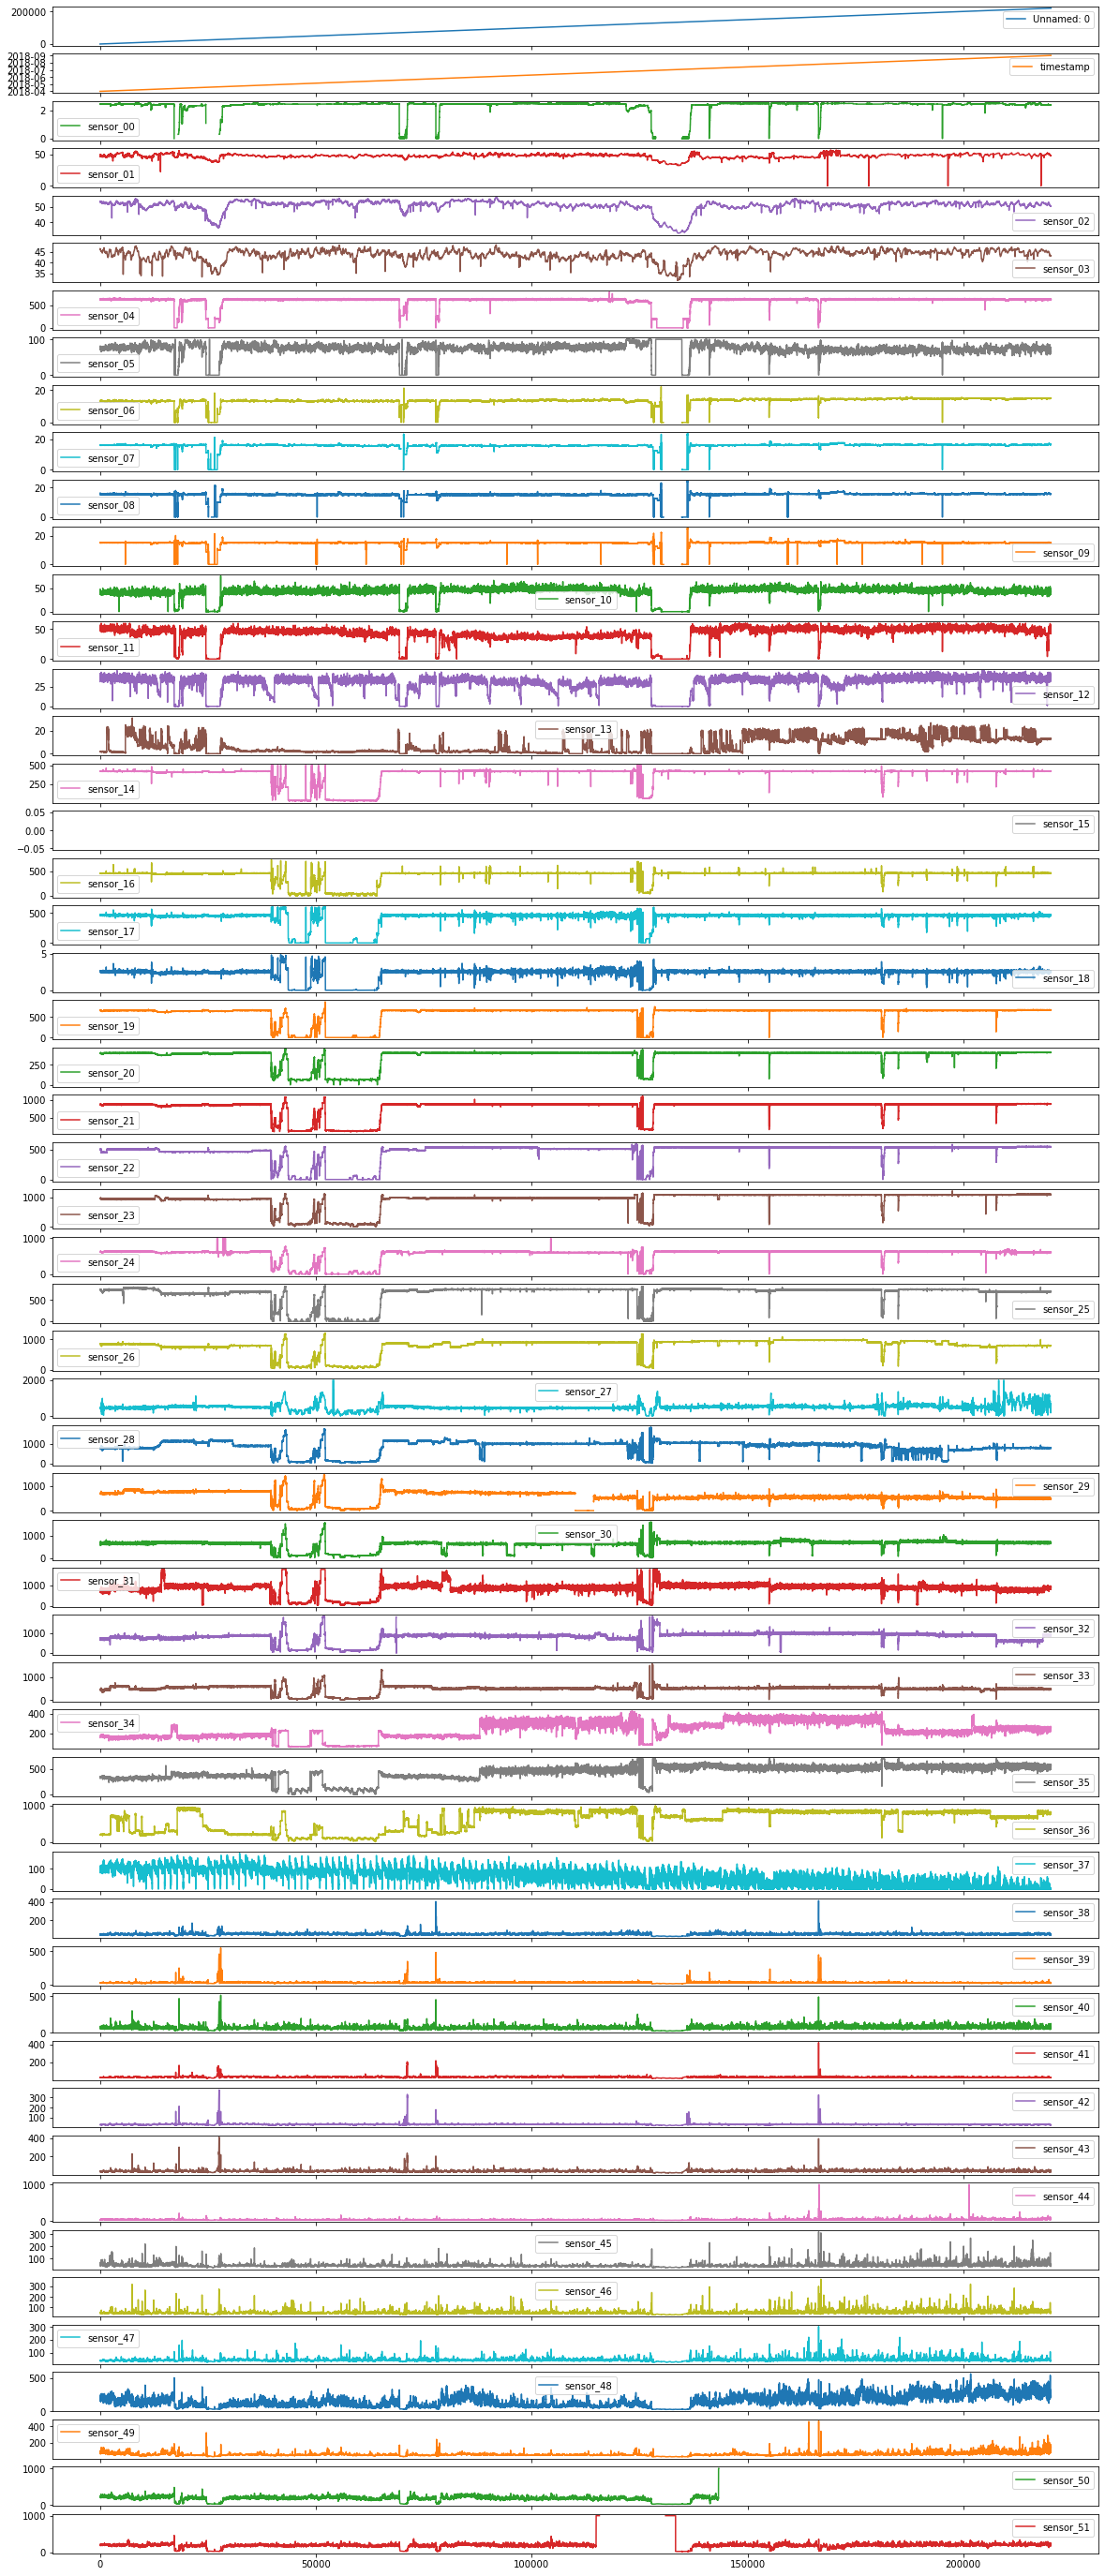

In [3]:
# Visualize separate subplot for each column 
data.plot(subplots=True, sharex=True, figsize=(20,50))

<p>Can observe a pattern in the distribution of the sensor data.
(2,3),
(4,5,6,7,8,9),
(10,11,12),
(14,16,17,18),
(19,20,21,22,23,24),
(25,26,28,29,30,31,32,33),
(34,35),
(38,39,40,41,42,43,45,46,47).</p>

<p>There are some signals that are very noisy nad seems to follow no trend in particular.</p>

<p>Measured signals of some sensors overlap with each other. Reason:In actual operation, pump systems are oftem equipped with more than one sensor for a single operating parameterfor reasonssuch as  safety, operation/system reliability.</p>

<p>On basisof the above analysis, determining which sensor signal influence the operating state of the pump is important for modelling. To optimize the model, we proceed to select the input parameters of the model according to the following hypothesis.</p>

<p>
    This is a <b>Multi-variate Time series Problem</b>
</p>


In [ ]:
#For categorical variables we can introduce a new category
data['machine_status'].value_counts()

<p>7 BROKEN statuses ->
We can assume that 25% of the data could be used to train the model (including 2 BROKEN status) and remaining 75% of the data(including 5 BROKEN status) is used to test the predictability of the model based on the model. <p/>

<p>For graphical illustration purpose, we assume the BROKEN state transition has the value of 0, the RECOVERING state and NORMAL state has the value of 0.5 and 1 respectively. New column created -> "operation_status"<p/>

In [ ]:
#status = [(data['machine_status'] == 'BROKEN'), (data['machine_status'] == 'RECOVERING'), (data['machine_status'] == 'NORMAL')]
#values = [1,0,0]
#data['operation_status'] = np.select(status, values, default=0)
#data.drop(['machine_status'], axis=1, inplace=True)

In [ ]:
#tocheck whether there are any obvious patterns in operation status,plotting again

data.plot(subplots=True, sharex=True, figsize=(20,50))

In [ ]:
data.columns

In [ ]:
df1 = pd.DataFrame(data, columns = ['sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49'])
data.columns

### Feature Engineering using SelectKBest

The Scikit-learning API provides the SelectKBest class to extract the best features from a given data set. _scorefunc parameter allow to select the features according to the highest scores. SelectKBest can use for both regression and classification data.
Since the response variable machine_status is a categorical variable, we can use chi2 as the scoring function for SelectKBest.

This uses the hypothesis testing as follows,<br>
H_0: The feature has no role to play with the response variable (The feature is not important)<br>
H_1: The feature has a role to play with the response variable (The feature is important)<br>

In [ ]:
x.columns

In [ ]:
# feature importance scores

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=20)
fit = selector.fit(x, one_hot['NORMAL'])
fit.scores_

In [ ]:
# select 20 important features

selected = selector.fit_transform(x, one_hot['NORMAL'])
mask = selector.get_support()
feature_names = list(x.columns.values)

new_features = []
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

selected = x.loc[:,new_features]
selected.columns

## Upload the dataset to Azure Data Lake Storage

### Assumptions

Many measuremets follow the same trend. 
 - So decided to keep only the features of interest and drop the rest.
 - Need to perform <b>feature nomalization</b> to bring all values into the range [0,1], by dropping unused features.

Set 0: sensors 4,6,7,8,9 wll be included in data set df0.
Set 1: sensors 1, 4, 10, 14, 19, 25, 34, 38.
Set 2: sensors 2, 5, 11, 16, 20, 26, 39
Set 3: sensors 3, 6, 12, 17, 21, 28, 40

In [ ]:
df2 = pd.DataFrame(data, columns = ['sensor_02', 'sensor_05', 'sensor_11', 'sensor_16', 'sensor_20', 'sensor_26', 'sensor_35', 'sensor_40', 'operation_status','timestamp'])

#df2 = df1.head(4)

df2.plot(subplots =True, sharex = True, figsize = (20,20))



In [ ]:
nested_df = (df2.groupby(['timestamp'])
.apply(lambda x: x[['sensor_02', 'sensor_05', 'sensor_11', 'sensor_16', 'sensor_20', 'sensor_26', 'sensor_35', 'sensor_40', 'operation_status']].to_dict('records')[0])
.reset_index()
.rename(columns={0:'telemetry', 'timestamp':'enqueuedTime'})
.assign(deviceId='machine-1')
.reindex(['telemetry','deviceId','enqueuedTime'], axis=1))

In [ ]:
nested_df

In [ ]:
# write in to a Data lake container
#data.to_csv('abfss://wpmdemo@testsipelkadls.dfs.core.windows.net/data/wpm_refined_historical_data.csv', 
#            storage_options = {'account_key':'nY110ZUdg7oVpWW96ugUfr7AyPLyDsiqmgSo+u1tE3+ZFtu6n06Dz0QU/IRY3igC8JdC7b8rMBrPh9VXq54lVA=='}) 

#Data Lake Service Client setup

from azure.storage.filedatalake import DataLakeServiceClient

storage_account_name = 'testsipelkadls'
storage_account_key  = 'nY110ZUdg7oVpWW96ugUfr7AyPLyDsiqmgSo+u1tE3+ZFtu6n06Dz0QU/IRY3igC8JdC7b8rMBrPh9VXq54lVA=='

#https://mlapmtest2mldls.dfs.core.windows.net/mlapmtest2

try:
    global service_client
    
    service_client = DataLakeServiceClient (account_url="{}://{}.dfs.core.windows.net".format("https", storage_account_name), 
                                            credential=storage_account_key)
except Exception as e:
    print(e)
    

In [ ]:
# write json file to the Azure Data Lake

try:

    file_system_client = service_client.get_file_system_client(file_system="wpmdemo") #container

    directory_client = file_system_client.get_directory_client("data") 
        
    file_client = directory_client.get_file_client("wpm_refined_historical_data.json")

    local_file = open("testout/wpm_refined_historical_data.json",'r')

    file_contents = local_file.read()

    file_client.upload_data(file_contents, overwrite=True)

except Exception as e:
    print(e)

In [ ]:
# write in to a local machine folder
#df2.to_csv('testout/wpm_refined_historical_data.csv')

#nested_df.to_json('testout/wpm_refined_historical_data.json', date_format='iso', date_unit='ns', orient='records', lines=True) 
nested_df.to_json('testout/machine-1.json', date_format='iso', date_unit='ns', orient='records', lines=True) 

## LSTM model

### Training the Model and Implement the Prediction

<b>Training set:</b>
We choose 50,000 data points with 2 broken points to train the model,

<b>Testing set:</b>
the remaining 170,000 points with 5 broken states will be used to test the predictivity of the model.

In [ ]:
# Before machine learning can be used, time series forecasting problems must be re-framed as supervised learning problems. 
# From a sequence to pairs of input and output sequences.
# function to do the re-framing.

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#bring all values into the range [0,1].
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#reframe in to a supervised learning problem - using a one time step forecasting pattern
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=150, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
import numpy as np
aa=[x for x in range(170000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:170000], marker='.', label="actual")
plt.plot(aa, inv_yhat[:170000], 'r', label="prediction with the model")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
memebers = ['England', 'USA', 'Russia', 'Sri Lanka', 'India']
members_series = pd.Series(memebers)
members_series